In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

Autoregressive Model : A linear model , where current period values are a sum of past outcomes multiplied by a numeric factor.

(AR1)==>  x@t = c + bx@t-1 + E@t


x@t-1 = the values of x during the previous period




b = any numeric constant by which we multiply the lagged variable,
|b| <1




E@t = Residual , the diference between our prediction for period "t" and the correct value






(AR2) ==>
x@t = c + b1 x@t-1 + b2 x@t-2 +E@t    





more lags ==> more complicated ==> more coefficients ==> more likely not significant

In [ ]:
raw_csv_data = pd.read_csv("Book1.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)
df_comp = df_comp.asfreq ('b')
df_comp = df_comp.fillna(method= 'ffill')

In [ ]:
df_comp['market_value'] = df_comp.spx

In [ ]:
df_comp['market_value'] = df_comp.ftse

In [ ]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df_test = df_comp.iloc[:size], df_comp.iloc[size:]

THE ACF (auto correlation function)

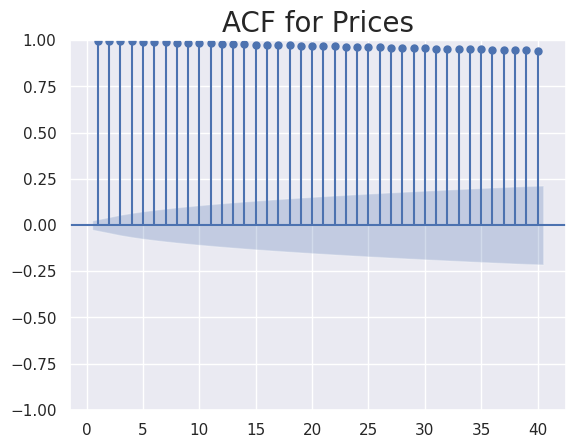

In [ ]:
sgt.plot_acf(df_comp.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

# the effects barely deteriorate over time
# the more lags we include, the better our model will fit the data set we feed it
# ACF captures both direct and indirect effect that previous value have on current one

THE *PACF*(partial autocorrelation function)

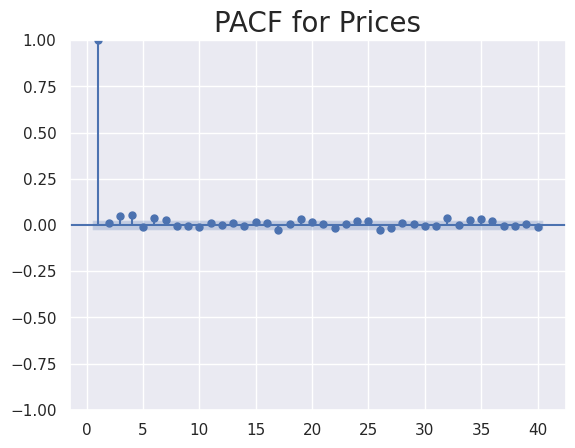

In [ ]:
sgt.plot_pacf(df_comp.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

#coefficients after 25th lag are not significant, so we can directly ignore them
# this means less than 25 lags will work for us

In [ ]:
# How to fit a time series into an auto-regressive model
#AR(1)
model_ar1 = ARIMA(df_comp.market_value, order =(1,0,0))
# 1 means no. of past values we wish to incorporate, 0 means not taking any residual



In [ ]:
results_ar1 = model_ar1.fit()

In [ ]:
results_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34437.979
Date:                Tue, 13 Jun 2023   AIC                          68881.958
Time:                        08:45:58   BIC                          68902.192
Sample:                    01-07-1994   HQIC                         68888.968
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6820    560.775      9.672      0.000    4324.582    6522.782
ar.L1          0.9990      0.001   1383.492      0.000       0.998       1.000
sigma2      3407.9480     36.199     94.145      0.000    3337.000    3478.896
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              3660.69
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.19
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar2 = ARIMA(df_comp.market_value, order =(2,0,0))
results_ar2 = model_ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34437.842
Date:                Tue, 13 Jun 2023   AIC                          68883.684
Time:                        08:46:00   BIC                          68910.663
Sample:                    01-07-1994   HQIC                         68893.032
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    480.212     11.294      0.000    4482.482    6364.878
ar.L1          0.9902      0.009    112.935      0.000       0.973       1.007
ar.L2          0.0086      0.009      0.982      0.326      -0.009       0.026
sigma2      3407.5183     36.308     93.850      0.000    3336.356    3478.681
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3643.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar3 = ARIMA(df_comp.market_value, order =(3,0,0))
results_ar3 = model_ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34430.886
Date:                Tue, 13 Jun 2023   AIC                          68871.771
Time:                        08:46:02   BIC                          68905.495
Sample:                    01-07-1994   HQIC                         68883.456
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    498.503     10.880      0.000    4446.633    6400.727
ar.L1          0.9898      0.009    112.240      0.000       0.973       1.007
ar.L2         -0.0381      0.012     -3.161      0.002      -0.062      -0.014
ar.L3          0.0471      0.008      5.699      0.000       0.031       0.063
sigma2      3400.3736     36.273     93.744      0.000    3329.280    3471.467
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3654.68
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.23
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar4 = ARIMA(df_comp.market_value, order =(4,0,0))
results_ar4 = model_ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34421.768
Date:                Tue, 13 Jun 2023   AIC                          68855.536
Time:                        08:46:04   BIC                          68896.004
Sample:                    01-07-1994   HQIC                         68869.557
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    518.610     10.458      0.000    4407.224    6440.136
ar.L1          0.9873      0.009    111.237      0.000       0.970       1.005
ar.L2         -0.0360      0.012     -2.970      0.003      -0.060      -0.012
ar.L3         -0.0063      0.011     -0.550      0.582      -0.029       0.016
ar.L4          0.0539      0.008      6.634      0.000       0.038       0.070
sigma2      3390.7236     36.932     91.811      0.000    3318.339    3463.108
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3463.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.27
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar5 = ARIMA(df_comp.market_value, order =(5,0,0))
results_ar5 = model_ar5.fit()
results_ar5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -34421.477
Date:                Tue, 13 Jun 2023   AIC                          68856.955
Time:                        08:46:05   BIC                          68904.167
Sample:                    01-07-1994   HQIC                         68873.313
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    514.421     10.543      0.000    4415.432    6431.927
ar.L1          0.9878      0.009    111.205      0.000       0.970       1.005
ar.L2         -0.0361      0.012     -2.975      0.003      -0.060      -0.012
ar.L3         -0.0066      0.011     -0.581      0.561      -0.029       0.016
ar.L4          0.0635      0.012      5.439      0.000       0.041       0.086
ar.L5         -0.0097      0.008     -1.185      0.236      -0.026       0.006
sigma2      3390.9019     37.140     91.301      0.000    3318.110    3463.694
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3433.89
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.26
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar6 = ARIMA(df_comp.market_value, order =(6,0,0))
results_ar6 = model_ar6.fit()
results_ar6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -34416.802
Date:                Tue, 13 Jun 2023   AIC                          68849.604
Time:                        08:46:07   BIC                          68903.561
Sample:                    01-07-1994   HQIC                         68868.299
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    535.041     10.137      0.000    4375.019    6472.340
ar.L1          0.9882      0.009    110.213      0.000       0.971       1.006
ar.L2         -0.0385      0.012     -3.148      0.002      -0.063      -0.015
ar.L3         -0.0064      0.011     -0.556      0.578      -0.029       0.016
ar.L4          0.0649      0.012      5.557      0.000       0.042       0.088
ar.L5         -0.0478      0.011     -4.259      0.000      -0.070      -0.026
ar.L6          0.0385      0.008      4.691      0.000       0.022       0.055
sigma2      3386.2104     37.063     91.363      0.000    3313.568    3458.853
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              3438.42
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.28
Prob(H) (two-sided):                  0.14   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar7 = ARIMA(df_comp.market_value, order =(7,0,0))
results_ar7 = model_ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34414.286
Date:                Tue, 13 Jun 2023   AIC                          68846.572
Time:                        08:46:10   BIC                          68907.274
Sample:                    01-07-1994   HQIC                         68867.604
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    548.164      9.894      0.000    4349.297    6498.062
ar.L1          0.9871      0.009    109.238      0.000       0.969       1.005
ar.L2         -0.0372      0.012     -2.996      0.003      -0.062      -0.013
ar.L3         -0.0082      0.011     -0.714      0.475      -0.031       0.014
ar.L4          0.0650      0.012      5.572      0.000       0.042       0.088
ar.L5         -0.0467      0.011     -4.157      0.000      -0.069      -0.025
ar.L6          0.0106      0.012      0.916      0.360      -0.012       0.033
ar.L7          0.0283      0.009      3.233      0.001       0.011       0.045
sigma2      3384.0371     37.041     91.360      0.000    3311.438    3456.636
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3452.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model_ar8 = ARIMA(df_comp.market_value, order =(8,0,0))
results_ar8 = model_ar8.fit()
results_ar8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34414.200
Date:                Tue, 13 Jun 2023   AIC                          68848.400
Time:                        08:46:13   BIC                          68915.847
Sample:                    01-07-1994   HQIC                         68871.769
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    550.331      9.855      0.000    4345.051    6502.309
ar.L1          0.9873      0.009    109.205      0.000       0.970       1.005
ar.L2         -0.0372      0.012     -2.988      0.003      -0.062      -0.013
ar.L3         -0.0085      0.012     -0.731      0.465      -0.031       0.014
ar.L4          0.0654      0.012      5.553      0.000       0.042       0.088
ar.L5         -0.0467      0.011     -4.159      0.000      -0.069      -0.025
ar.L6          0.0104      0.012      0.898      0.369      -0.012       0.033
ar.L7          0.0333      0.013      2.618      0.009       0.008       0.058
ar.L8         -0.0051      0.009     -0.569      0.569      -0.023       0.012
sigma2      3384.3667     37.098     91.229      0.000    3311.657    3457.077
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3446.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

LLR TEST

In [ ]:
def LLR_test(mod_1,mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p

Comparing Higher Lag AR Models

In [ ]:
LLR_test(model_ar2, model_ar3)

0.0

In [ ]:
LLR_test(model_ar5, model_ar6)

0.002

In [ ]:
model_ar4 = ARIMA(df_comp.market_value, order = [4,0,0])
results_ar4 = model_ar4.fit()
print(results_ar4.summary())
print ( "LLR test : " + str (LLR_test(model_ar3, model_ar4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34421.768
Date:                Tue, 13 Jun 2023   AIC                          68855.536
Time:                        08:46:22   BIC                          68896.004
Sample:                    01-07-1994   HQIC                         68869.557
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    518.610     10.458      0.000    4407.224    6440.136
ar.L1          0.9873      0.009    111.237      0.000       0.970       1.005
ar.L2         -0.0360      0.012     -2.970      0.0

In [ ]:
model_ar5 = ARIMA(df_comp.market_value, order = [5,0,0])
results_ar5 = model_ar5.fit()
print(results_ar5.summary())
print ( "LLR test : " + str (LLR_test(model_ar4, model_ar5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -34421.477
Date:                Tue, 13 Jun 2023   AIC                          68856.955
Time:                        08:46:25   BIC                          68904.167
Sample:                    01-07-1994   HQIC                         68873.313
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    514.421     10.543      0.000    4415.432    6431.927
ar.L1          0.9878      0.009    111.205      0.000       0.970       1.005
ar.L2         -0.0361      0.012     -2.975      0.0

In [ ]:
model_ar6 = ARIMA(df_comp.market_value, order = [6,0,0])
results_ar6 = model_ar6.fit()
print(results_ar6.summary())
print ( "LLR test : " + str (LLR_test(model_ar5, model_ar6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -34416.802
Date:                Tue, 13 Jun 2023   AIC                          68849.604
Time:                        08:46:33   BIC                          68903.561
Sample:                    01-07-1994   HQIC                         68868.299
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    535.041     10.137      0.000    4375.019    6472.340
ar.L1          0.9882      0.009    110.213      0.000       0.971       1.006
ar.L2         -0.0385      0.012     -3.148      0.0

In [ ]:
model_ar7 = ARIMA(df_comp.market_value, order = [7,0,0])
results_ar7 = model_ar7.fit()
print(results_ar7.summary())
print ( "LLR test : " + str (LLR_test(model_ar6, model_ar7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34414.286
Date:                Tue, 13 Jun 2023   AIC                          68846.572
Time:                        08:46:39   BIC                          68907.274
Sample:                    01-07-1994   HQIC                         68867.604
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    548.164      9.894      0.000    4349.297    6498.062
ar.L1          0.9871      0.009    109.238      0.000       0.969       1.005
ar.L2         -0.0372      0.012     -2.996      0.0

In [ ]:
model_ar8 = ARIMA(df_comp.market_value, order = [8,0,0])
results_ar8 = model_ar8.fit()
print(results_ar8.summary())
print ( "LLR test : " + str (LLR_test(model_ar7, model_ar8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34414.200
Date:                Tue, 13 Jun 2023   AIC                          68848.400
Time:                        08:46:47   BIC                          68915.847
Sample:                    01-07-1994   HQIC                         68871.769
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    550.331      9.855      0.000    4345.051    6502.309
ar.L1          0.9873      0.009    109.205      0.000       0.970       1.005
ar.L2         -0.0372      0.012     -2.988      0.0

In [ ]:
#repeat the same process for different vales

In [ ]:
#AR models work best when data comes from stationarity process

In [ ]:
print("LLR test : " + str(LLR_test(model_ar1, model_ar7, DF=6)))

LLR test : 0.0


The Dickey-Fuller Test


In [ ]:
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sts.adfuller(df_comp.market_value)
# p>0.05 ==> non-stationarity data

(-1.5977788921179854,
 0.48470912054659654,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

Using Returns

In [ ]:
df_comp['returns'] = df_comp.market_value.pct_change(1).mul(100)
df = df_comp.iloc[1:]

In [ ]:
sts.adfuller(df.returns)
#data comes from stationarity process

(-15.140761332034833,
 7.016338451093401e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

ACF Returns

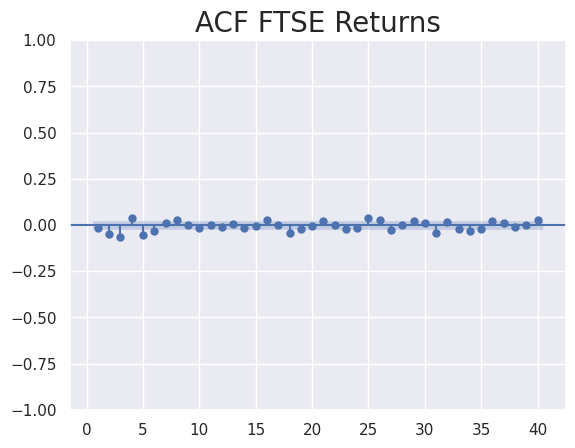

In [ ]:
sgt.plot_acf(df.returns, zero = False, lags = 40)
plt.title("ACF FTSE Returns", size = 20)
plt.show()

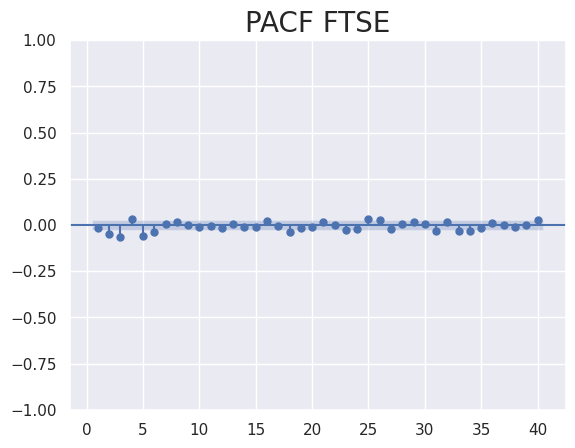

In [ ]:
sgt.plot_pacf(df.returns, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF FTSE", size = 20)
plt.show()

AR(1) For Returns

In [ ]:
model_ret_ar1 = ARIMA(df.returns, order = (1,0,0))

In [ ]:
results_ret_ar1 = model_ret_ar1.fit()

In [ ]:
results_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9597.705
Date:                Tue, 13 Jun 2023   AIC                          19201.409
Time:                        08:58:09   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.353      0.176      -0.009       0.047
ar.L1         -0.0176      0.007     -2.345      0.019      -0.032      -0.003
sigma2         1.2469      0.011    113.319      0.000       1.225       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10512.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Higher Lag AR Models for returns

In [ ]:
model_ret_ar2 = ARIMA(df.returns, order = (2,0,0))
results_ret_ar2 = model_ret_ar2.fit()
results_ret_ar2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9590.309
Date:                Tue, 13 Jun 2023   AIC                          19188.618
Time:                        08:59:53   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.409      0.159      -0.007       0.045
ar.L1         -0.0184      0.008     -2.432      0.015      -0.033      -0.004
ar.L2         -0.0485      0.007     -6.981      0.000      -0.062      -0.035
sigma2         1.2440      0.011    112.784      0.000       1.222       1.266
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             10336.58
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This means b2 is significantly different from zero , and must be included in the model, also p value has decreased

LLR Test

In [ ]:
LLR_test(model_ret_ar1, model_ret_ar2)

#AR(2) > AR(1)

0.0

Normalising Values

In [ ]:
benchmark = df_comp.market_value.iloc[0]
df_comp['norm'] = df_comp.market_value.div(benchmark).mul(100)
sts.adfuller(df_comp.norm)

(-1.5977788921182068,
 0.48470912054648535,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 24286.095063927056)

Normalising Returns

In [ ]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

<ipython-input-58-4c0e57a94e6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_ret'] = df.returns.div(bench_ret).mul(100)


(-15.140761332034836,
 7.016338451093401e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 99642.30855107102)

Normalised Returns

In [ ]:
model_norm_ret_ar1 = ARIMA(df.norm_ret, order = (1,0,0))
results_norm_ret_ar1 =model_norm_ret_ar1.fit()
results_norm_ret_ar1.summary()

# normalising doesn't have any effect on model selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -50131.657
Date:                Tue, 13 Jun 2023   AIC                         100269.313
Time:                        09:20:57   BIC                         100289.547
Sample:                    01-10-1994   HQIC                        100276.324
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1199      8.959     -1.353      0.176     -29.679       5.439
ar.L1         -0.0176      0.008     -2.346      0.019      -0.032      -0.003
sigma2      5.079e+05   4482.359    113.301      0.000    4.99e+05    5.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10512.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Analysing the Residuals

In [ ]:
df['res_price'] = results_ar2.resid
df.res_price.mean()

<ipython-input-61-75945a51de44>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['res_price'] = results_ar2.resid


0.6786202617924102

In [ ]:
df.res_price.var()

3407.0658629696313

AR models work very poorly in predicting non-stationarity data

In [ ]:
sts.adfuller(df.res_price)

(-35.480056586851994,
 0.0,
 5,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68465.18443381597)

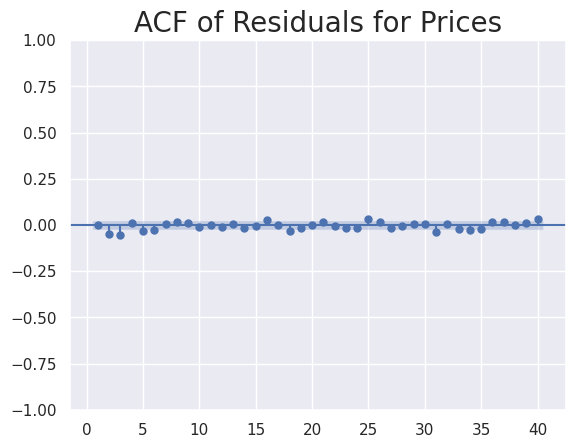

In [ ]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF of Residuals for Prices", size = 20)
plt.show()

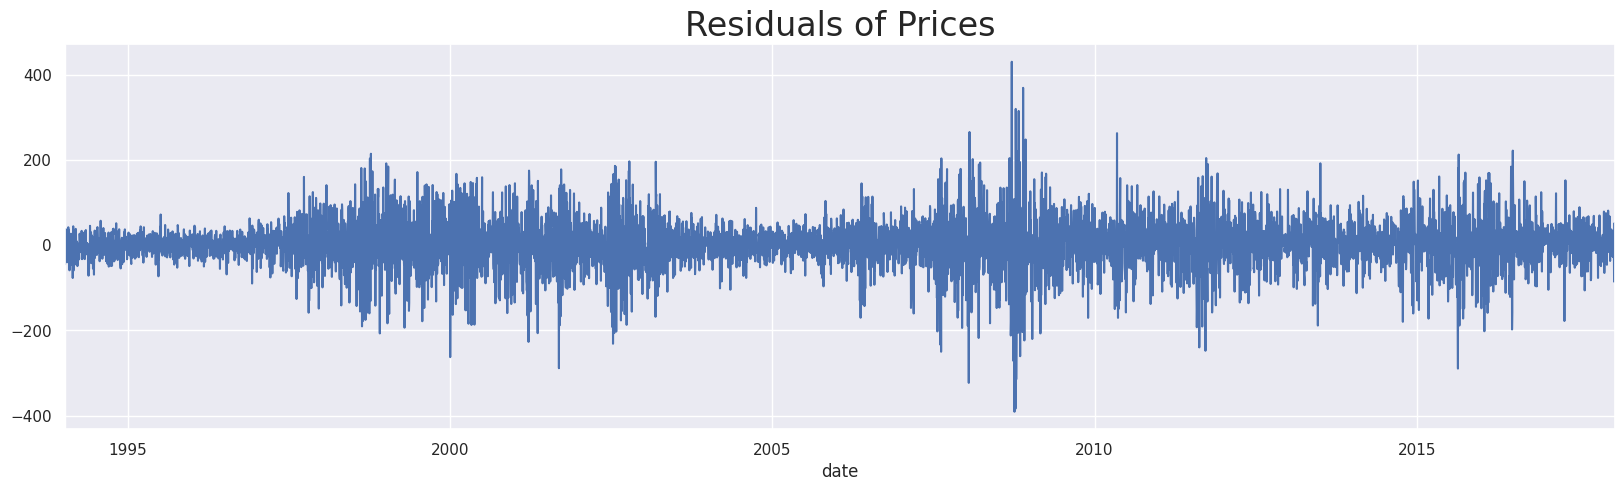

In [ ]:
df.res_price[1:].plot(figsize = (20,5))
plt.title("Residuals of Prices", size = 24)
plt.show()

# no obvious pattern, like white noise